News Mood:

From given graphs, None of the Sentiment Analysis had a negative average sentiment for the date of July 5th, 2018

Average Sentiment Analysis of CBS was the most positive out of the group

From the graphs of average Sentiment Analysis the CNN and New York Times was closest to Neutral in their sentiment

From the scatter plot, BBC, CBS and FoxNews had the highest levels in positive sentiments, whereas, CNN and NYtimes were in the lower quadrant, seperating the two and giving similar results to the mean or average graphs.



In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Variables for holding sentiments
sentiments = []
# Target Account
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")


In [3]:

# Counter
counter = 1

for user in target_user:
       

# Get all tweets from home feed
    public_tweets = api.user_timeline(user, count = 100)
    tweetnumber = 1
# Loop through all tweets 
    for tweet in public_tweets:
 
    # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = tweetnumber

        # Add sentiments for each tweet into a list
    
        sentiments.append({"User": user,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": tweetnumber})

        # Add to counter
        tweetnumber +=1
        counter += 1

In [ ]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#Export the DataFrame to as csv.

sentiments_pd.to_csv("Twitter_News_Mood.csv", index=False)
sentiments_pd.head()
sentiments_pd.head()

In [47]:
# remove @ from User column
sentiments_pd['User'] = sentiments_pd['User'].replace("@","")
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.9393,Wed Jul 04 19:03:04 +0000 2018,0.439,0.000,0.561,1,BBC
1,-0.5103,Wed Jul 04 18:02:03 +0000 2018,0.535,0.321,0.144,2,BBC
2,0.6597,Wed Jul 04 16:52:02 +0000 2018,0.631,0.086,0.284,3,BBC
3,-0.2960,Wed Jul 04 16:02:01 +0000 2018,0.855,0.145,0.000,4,BBC
4,0.0000,Wed Jul 04 14:27:00 +0000 2018,1.000,0.000,0.000,5,BBC
5,0.0000,Wed Jul 04 14:04:05 +0000 2018,1.000,0.000,0.000,6,BBC
6,-0.8934,Wed Jul 04 13:01:25 +0000 2018,0.526,0.474,0.000,7,BBC
7,0.7964,Wed Jul 04 12:34:02 +0000 2018,0.645,0.068,0.287,8,BBC
8,0.6114,Wed Jul 04 12:01:08 +0000 2018,0.600,0.000,0.400,9,BBC
9,0.0000,Wed Jul 04 11:01:08 +0000 2018,1.000,0.000,0.000,10,BBC


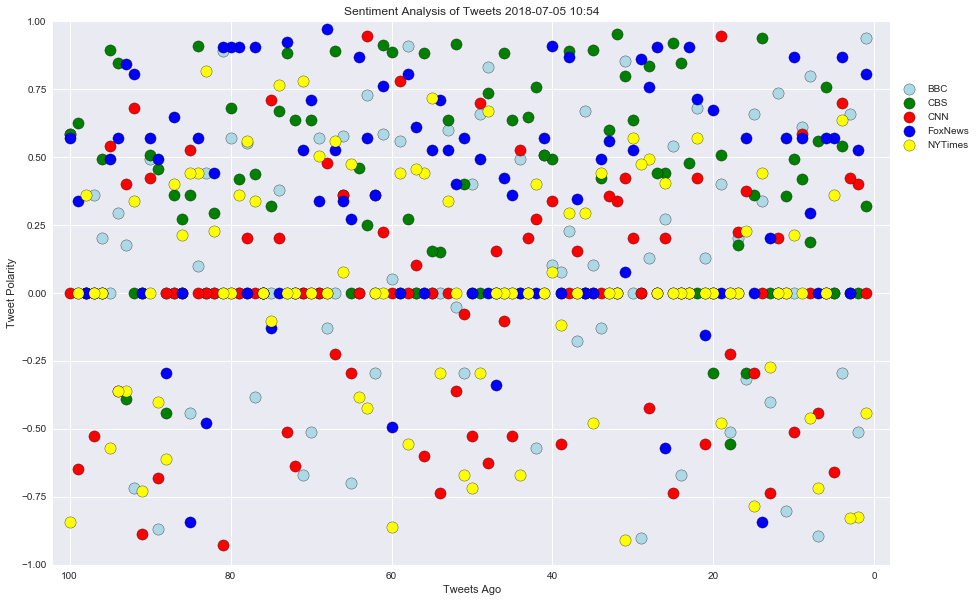

In [49]:
# Create plot
sns.set()
plt.figure(figsize = (15,10))

colors={"BBC": "lightblue",
        "CBS":"green", 
        "CNN":"red",
        "FoxNews":"blue",
        "NYTimes": "yellow"}
#plot scatterplot using a for loop.
for target_user in colors.keys():
    dframe = sentiments_pd[sentiments_pd["User"] == target_user]
    plt.scatter(dframe["Tweets Ago"],dframe["Compound"],label = target_user, color = colors[target_user], edgecolor = "black", s = 125)


# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets {now}" )
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#Add legend
plt.legend(bbox_to_anchor = (1,0.9))
plt.savefig('sentiment_analysis.png')
plt.show()

In [50]:
scoresbyuser=sentiments_pd.groupby("User")["Compound"].mean()
scoresbyuser#check

User
BBC        0.104107
CBS        0.359104
CNN        0.006885
FoxNews    0.340329
NYTimes    0.014726
Name: Compound, dtype: float64

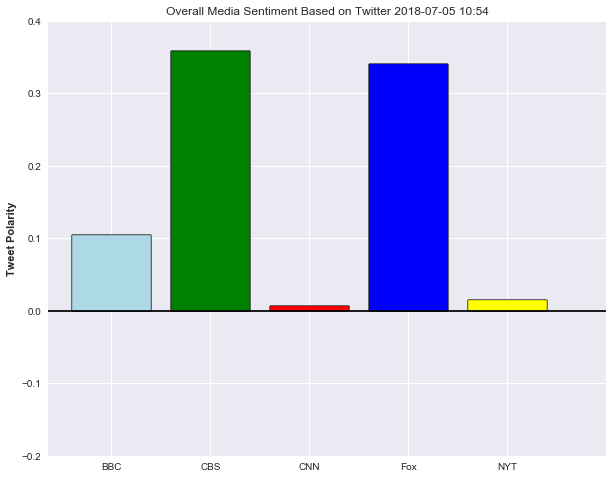

In [51]:
x_axis=np.arange(len(scoresbyuser))
# x_axis.head()
# Create bar chart
sns.set()

plt.figure(figsize = (10,8))
for target_user in colors.keys():
    df = sentiments_pd[sentiments_pd['User'] == target_user]
    overall_sentiment = plt.bar(x_axis,scoresbyuser, color = ("lightblue", "green", "red", "blue", "yellow"), label = target_user, edgecolor = "black")
    
plt.ylim(-.2, .4)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.title(f"Overall Media Sentiment Based on Twitter {now}" )
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)
plt.show()
plt.savefig('overall_sentiment.png')